In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from scipy.interpolate import CubicSpline

plt.rcParams["font.family"] = "Comic Sans MS"

In [2]:
df = pd.read_table("../input/front_wheel.txt", sep = " ")
df.columns
previous = 0
for i, row in df.iterrows():
    if i ==0:
        previous = row['y']
    elif previous < row['y']:
        # print(i, row['y'])
        previous = row['y']
    elif previous > row['y']:
        print(i, row['y'])
        previous = row['y']
        

In [3]:
y = list(df['y'])
l1 = [y[i] for i in range(len(y)-1) if y[i+1] - y[i] <= 0]

print(l1)

[]


### Przednie koło 

In [4]:

z = np.polyfit(df['y'],df['x'] ,20)
p = np.poly1d(z)

y_lin = np.arange(min(df['y']), max(df['y']), 0.1)
fitted_x = p(y_lin)
# # y_lin = np.linspace(min(df['y']), max(df['y']), 100)


# cubic_spline_interpolation = CubicSpline(list(df['y']), list(df['x']))
# out_x_inter =  cubic_spline_interpolation(y_lin)

# plt.plot(y_lin, fitted_x)
# # plt.plot(y_lin, out_x_inter)

l2 = [np.interp(i, df['y'], df['x']) for i in y_lin]
    
# plt.plot(y_lin, l2)

area = round(np.trapz(fitted_x, dx =0.1),2)
area2 = round(np.trapz(l2, dx =0.1),2)

print(area)
print(area2)

361.15
358.21


c:\Users\marek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


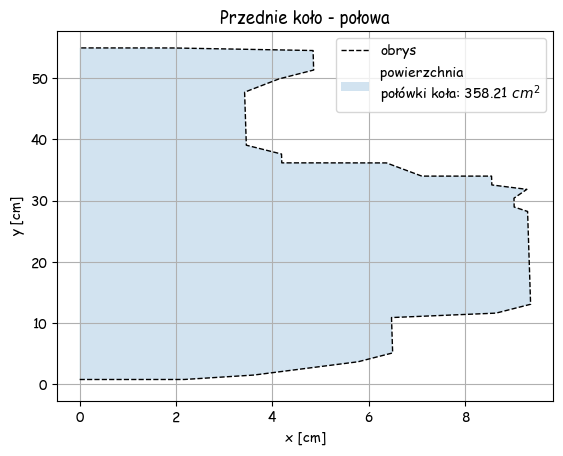

In [5]:
fig, ax = plt.subplots()
plt.plot(df["x"], df['y'], c = 'black', linestyle='dashed', linewidth = 1, label = 'obrys')
# plt.plot(p(y_lin), y_lin, c = "red", linestyle = 'dashed')
# plt.plot(l2, y_lin, c = 'red', label = "aproksymacja liniowa", linestyle = 'dashed', linewidth = 2)
plt.grid(True)
plt.fill_between(df['x'], df['y'], label = f"powierzchnia \npołówki koła: {area2} $cm^2$", alpha=0.2)
plt.legend()
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.title("Przednie koło - połowa")
plt.savefig("../img/front_wheel_half.png", dpi = 200)

### Reszta podwozia

In [6]:
# gorny obrys
df = pd.read_table("../input/side_wheel_dolny_obrys.txt", sep = " ")

# dolny obrys
df1 = pd.read_table("../input/side_wheel_gorny.txt", sep = " ") 

# sprawdzenie czy x-y są rosnące (potrzebne do interpolacji)
y = list(df1['x'])
l1 = [y[i] for i in range(len(y)-1) if y[i+1] - y[i] <= 0]
print(l1)
        

[]


powierzchnia podwozia:  794.9128000000001


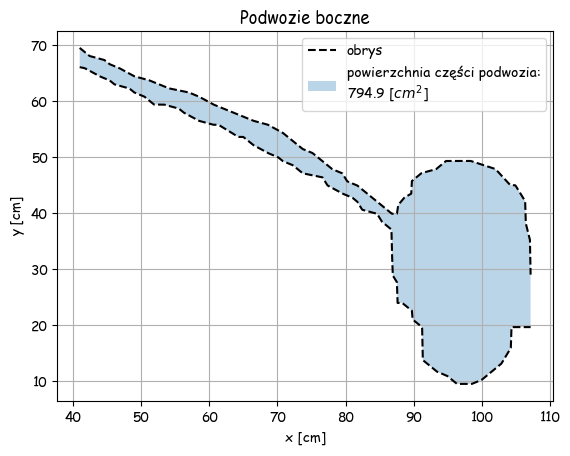

In [7]:
# interpolacja liniowa obrysu
x_lin = np.arange(min(df1['x']), max(df1['x']), 0.1)

l_dolny = [np.interp(i, df['x'], df['y']) for i in x_lin]
l_gorny = [np.interp(i, df1['x'], df1['y']) for i in x_lin]
 
 # area = round(np.trapz(fitted_x, dx =0.1),4)
pow_gorna = round(np.trapz(l_gorny, dx =0.1),4)
pow_dolna = round(np.trapz(l_dolny, dx =0.1),4)
area = round(pow_gorna-pow_dolna, 1)
    
plt.plot(x_lin, l_dolny, c = 'black', linestyle = 'dashed', label = "obrys")
plt.plot(x_lin, l_gorny, c = 'black', linestyle = 'dashed')
plt.grid(True)
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.fill_between(x_lin, l_dolny, l_gorny, alpha = 0.3, label = f"powierzchnia części podwozia:\n{area} [$cm^2$]")
plt.title("Podwozie boczne")
plt.legend()
plt.savefig("../img/side_wheel_half.png", dpi = 200 )


print("powierzchnia podwozia: ",pow_gorna - pow_dolna )

### kadłub

In [8]:
from math import fabs

df = pd.read_table("../input/hull.txt", sep = " ")
df['x'] = df['x'].abs()

y = list(df['y'])
l1 = [y[i] for i in range(len(y)-1) if y[i+1] - y[i] <= 0]
print(l1)

[]


[ 55.22813688  55.32813688  55.42813688 ... 186.72813688 186.82813688
 186.92813688]


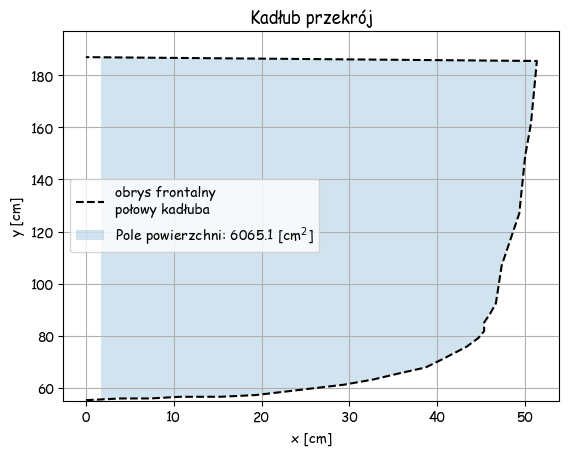

In [9]:
y_lin = np.arange(min(df['y']), max(df['y']), 0.1)
print(y_lin)
hull = [np.interp(i, df['y'], df['x']) for i in y_lin]
 
hull_area = round(np.trapz(hull, dx =0.1),1)

plt.plot(df['x'], df['y'], label = "obrys frontalny \npołowy kadłuba", linestyle = 'dashed', color = 'black')
# plt.plot(hull, y_lin, c = 'red')
plt.fill_between(hull, y_lin, label = f"Pole powierzchni: {hull_area} [cm$^2$]", alpha = 0.2)
plt.ylim([55, max(df['y'])+10])
plt.legend()
plt.grid(True)
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.title("Kadłub przekrój")

plt.savefig("../img/hull_half.png", dpi = 200)

### stabilizer

In [10]:
df = pd.read_table("../input/down_horizontal.txt", sep = " ")
df1 = pd.read_table("../input/up_horizontal.txt", sep = " ")

df['y'] = df['y'] -3
df1['y'] = df1['y'] -3
df['y'] = df['y'] * 100 
df1['y'] = df1['y'] * 100
df['x'] = df['x'] * 100 
df1['x'] = df1['x'] * 100

y = list(df1['x'])
l1 = [y[i] for i in range(len(y)-1) if y[i+1] - y[i] <= 0]
print(l1)

[]


[  5.2238806   5.3238806   5.4238806 ... 142.1238806 142.2238806
 142.3238806]
area:  10943.5


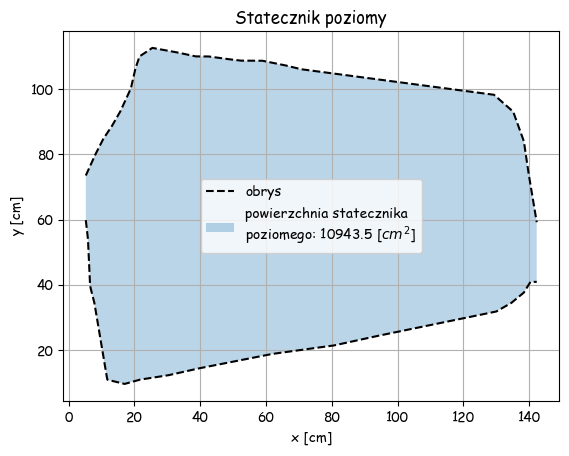

In [11]:
x_lin = np.arange(min(df1['x']), max(df1['x']), 0.1)
print(x_lin)
horizontal_d = [np.interp(i, df['x'], df['y']) for i in x_lin]
horizontal_u = [np.interp(i, df1['x'], df1['y']) for i in x_lin]


hor_d_area = round(np.trapz(horizontal_d, dx =0.1),1)
hor_u_area = round(np.trapz(horizontal_u, dx =0.1),1)

area = hor_u_area - hor_d_area
print("area: ", area)

plt.plot(x_lin, horizontal_d, c = 'black', linestyle = 'dashed', label = "obrys")
plt.plot(x_lin, horizontal_u, c = 'black', linestyle = 'dashed')
plt.grid(True)
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.fill_between(x_lin, horizontal_d, horizontal_u, alpha = 0.3, label = f"powierzchnia statecznika \npoziomego: {area} [$cm^2$]")
plt.title("Statecznik poziomy")
plt.legend()
plt.savefig("../img/horizontal.png", dpi = 200)


### vertical stab

In [12]:
df = pd.read_table("../input/vertical.txt", sep = " ")

df['y'] = df['y'] - min(df['y'])
df['x'] = df['x'] - 490

y = list(df['x'])
l1 = [y[i] for i in range(len(y)-1) if y[i+1] - y[i] <= 0]
print(l1)

[]


ramię działania statecznika poziomego 509.4970200236997


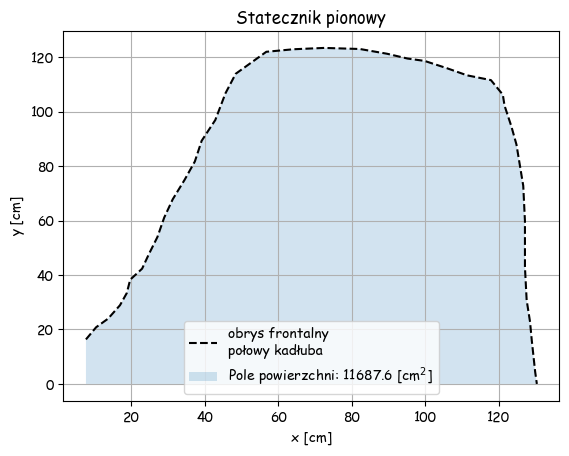

In [13]:
x_lin = np.arange(min(df['x']), max(df['x']), 0.1)
vert = [np.interp(i, df['x'], df['y']) for i in x_lin]

vert_area = round(np.trapz(vert, dx =0.1),1)

plt.plot(df['x'], df['y'], label = "obrys frontalny \npołowy kadłuba", linestyle = 'dashed', color = 'black')
# plt.plot(hull, y_lin, c = 'red')
plt.fill_between(x_lin, vert, label = f"Pole powierzchni: {vert_area} [cm$^2$]", alpha = 0.2)
# plt.ylim([55, max(df['y'])+10])
plt.legend()
plt.grid(True)
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.title("Statecznik pionowy")

plt.savefig("../img/vertical_stab.png", dpi = 200)

x = [119.4444444444445, 50.160619803476976]
y = [563.888888888889, 59.12462207105071]

print("ramię działania statecznika poziomego", ((x[0]-x[1])**2+(y[0]-y[1])**2)**0.5)